In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('Manaus.csv', sep=';', encoding='latin-1')
pd.set_option('display.max_rows', None)

c:\users\luiz fabio\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15,21,23,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
#Limpeza
cleaned_data = df[['_idade','_sexo','_bairro_mapa','_classificacao','_conclusao','_dt_notificacao','_teste_pcr','_teste_anticorpo','_teste_antigeno','_teste_igm','_teste_igg','_faixa etária']]
cleaned_data = cleaned_data.dropna()
cleaned_data = cleaned_data.reset_index(drop=True)
df = cleaned_data

In [35]:
teste = df.loc[df['_classificacao'] == 'Confirmado']
numero_casos = teste.shape[0]

In [36]:
numero_bairros = teste['_bairro_mapa'].value_counts().size

#TOP 10 bairros com mais casos
bairros = teste['_bairro_mapa'].value_counts().head(10)

bairros_outros = teste['_bairro_mapa'].value_counts()[10:].sum()

teste['_bairro_mapa'].value_counts()

CIDADE NOVA                 559
FLORES                      361
SÃO JOSÉ OPERÁRIO           341
ALVORADA                    330
PARQUE 10 DE NOVEMBRO       317
COMPENSA                    307
JORGE TEIXEIRA              282
COROADO                     278
TARUMÃ                      267
PETRÓPOLIS                  266
NOVO ALEIXO                 265
JAPIIM                      241
ALEIXO                      207
CENTRO                      205
REDENÇÃO                    176
TANCREDO NEVES              169
NOVA CIDADE                 165
ADRIANÓPOLIS                156
DOM PEDRO                   132
COLÔNIA TERRA NOVA          131
CIDADE DE DEUS              127
ZUMBI DOS PALMARES          122
SÃO JORGE                   117
PLANALTO                    115
SANTO ANTÔNIO               113
PONTA NEGRA                 106
LÍRIO DO VALE               103
MONTE DAS OLIVEIRAS         100
NOSSA SENHORA DAS GRAÇAS     99
GILBERTO MESTRINHO           92
NOVA ESPERANÇA               88
BETÂNIA 

In [37]:
bairros_nome = bairros.index

In [38]:
list_of_tuples = list(zip(bairros_nome, bairros))  

bairros_casos = pd.DataFrame(list_of_tuples, columns = ['Bairros', 'Casos'])

bairros_casos.loc[len(bairros_casos)] = ['OUTROS',bairros_outros]

bairros_casos

,Bairros,Casos
0,CIDADE NOVA,559
1,FLORES,361
2,SÃO JOSÉ OPERÁRIO,341
3,ALVORADA,330
4,PARQUE 10 DE NOVEMBRO,317
5,COMPENSA,307
6,JORGE TEIXEIRA,282
7,COROADO,278
8,TARUMÃ,267
9,PETRÓPOLIS,266


In [39]:
soma_de_casos = bairros_casos['Casos'].sum()

for i in range(11):
    porcentagem = (bairros_casos['Casos'][i]/numero_casos)*100
    
    bairros_casos['Casos'][i] = porcentagem


<ipython-input-39-9d19e6ca255f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bairros_casos['Casos'][i] = porcentagem


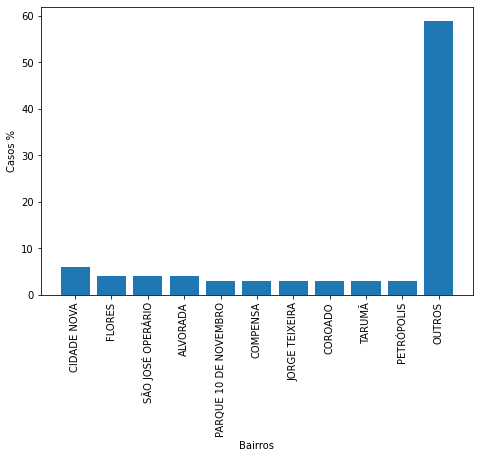

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(bairros_casos['Bairros'], bairros_casos['Casos'])
plt.xticks(bairros_casos['Bairros'],rotation=90)
ax.set_xlabel('Bairros')
ax.set_ylabel('Casos %')

plt.show()